In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import json

 ## Create an MLP to classify 784-dimensional images into the target 10-dimensional output. Used ReLU activation for the two hidden layers and softmax the output layer.

Extracted Weights and Bias from the mnist_network_params.hdf5 file
W1 shape: (200, 784)
b1 shape: (200,)
W2 shape: (100, 200)
b2 shape: (100,)
W3 shape: (10, 100)
b3 shape: (10,)
Results have been added to result.json
Number of correct classifications 9790
Number of wrong classifications 210


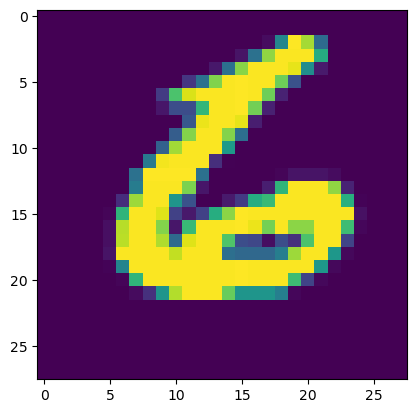

In [3]:
#read weights and biases
weight_bias_data = 'mnist_network_params.hdf5' 
test_data = 'mnist_testdata.hdf5'  

#extract weights and bias data from the mnist_network_params.hdf5
with h5py.File(weight_bias_data, 'r') as file: 
    #The file has 6 keys corresponding to: W 1, b 1, W 2, b 2, W 3, b 3. Verify the dimension of each numpy array with the shape property.
    W_1 = file['W1'][:]
    b_1 = file['b1'][:] 
    W_2 = file['W2'][:]     
    b_2 = file['b2'][:]
    W_3 = file['W3'][:]
    b_3 = file['b3'][:]
    
#verify the dimensions of each numpy array
print("Extracted Weights and Bias from the mnist_network_params.hdf5 file")
print("W1 shape:", W_1.shape)
print("b1 shape:", b_1.shape)
print("W2 shape:", W_2.shape)
print("b2 shape:", b_2.shape)
print("W3 shape:", W_3.shape)
print("b3 shape:", b_3.shape)

#extract xdata holds that holds pixel intensities and ydata that contains the corresponding class labels
with h5py.File(test_data, 'r') as file:
    x_data  = file['xdata'][:]
    y_data  = file['ydata'][:] 
    
#create MLP using numpy to classify 784-dimensional images into the target 10-dimensional output
#ReLU Function = f(x)=max(0,x) 
def relu(x):
    return np.maximum(0,x)

#softmax func 
def softmax(x):
    numerator = np.exp(x)
    denominator = np.sum(np.exp(x))
    output = np.exp(x)/np.sum(np.exp(x))  
    return output

def forward_propagation(x):
    output1 = np.dot(W_1, x) + b_1
    active1 = relu(output1)
    output2 = np.dot(W_2, active1) + b_2
    active2 = relu(output2)
    output3 = np.dot(W_3, active2) + b_3
    active3 = softmax(output3)
    return active3

store_prediction = []

#making predictions on each sample of the dataset  
correct_counter = 0
wrong_counter = 0
for i in range(x_data.shape[0]): #iterate a 10,000 times for 10,000 images
    x1 = x_data[i, :]
    y_pred = forward_propagation(x1)
    index = np.argmax(y_pred)
    true = np.argmax(y_data[i])
    
    if index == true:
        correct_counter += 1 #increment correct counter
    else:
        wrong_counter += 1 #increment wrong counter
    
    activations = [float(val) for val in y_pred]
    classification = int(index)
    output = {"index": i, "activations": activations, "classification": classification}
    store_prediction.append(output)

#format and write your results to file result.json
with open("result.json", "w") as f:
    f.write(json.dumps(store_prediction))
    
print("Results have been added to result.json")
    
#Compare your prediction with the (true) ydata label
print("Number of correct classifications", correct_counter)
print("Number of wrong classifications", wrong_counter)

#plot the graph 
plt.imshow(x_data[i].reshape(28,28))
plt.show()
